### PART B - 1 - (i)

Let 

X = number of bonds purchased

Y = number of shares of stock purchased by XYZ

Z = number of call options purchased (if > 0) or sold (if < 0)

Expected profit can be formulized by the following:

i) Face value of bond is £100 and selling it at £90 pounds so the total       profit of bond is **10X**.

ii) The expected profit of stock XYZ is the one third of difference between selling price and buying price.
(Taking one third as there are three scenarios with equal likelihood)
Stock XYZ price can remains at £20, can goes upto £40 and can drops to £20
. So the equation will be 

**(20Y-20Y) + (40Y-20Y) - (20Y - 12Y) = (0Y + 20Y - 8Y)/3 = 4Y.**

iii) Call Option : The expected profit from call option is also the one third of difference between selling price and buying price of call option.

number of shares - 100, purchased stock XYZ price - £15, call option premium price - 1000

Scenerio 1 : when stock XYZ price incresed to £40

(40 * 100) - (15 * 100) - 1000 = 2500 - 1000 = 1500

Scenerio 2 : when stock XYZ price is £20 

(20 * 100) - (15 * 100) - 1000 = 500 - 1000 = -500

Scenerio 3 : when stock XYZ price is £12

 Since stock is trading below the strike of $15 ,  the call option isn't exercised and it expires worthless. So, in scenerio 3, - 1000

**(1500Z - 500Z - 1000Z)/3 = 0Z**

Linear programming formula
Objective :

**max 10X + 4Y**

Constraints:

Considering the cost of Bonds, Stock XYZ and Call Option and cost cannot exceed 20000

**90X + 20Y + 1000Z  <= 20000**

As call option cannot exceed 50 

**Z <= 50**

As selling call option cannot exceed more than 50

**Z >= -50**

As it is not able to purchase negative quantities

**X >= 0**

**Y >= 0**

So final Formula is 

**max 10X + 4Y**

**90X + 20Y + 1000Z  <= 20000**

**Z <= 50**

**Z >= -50**

**X >= 0**

**Y >= 0**

In [1]:
!pip install gurobipy

In [2]:
from gurobipy import *

model_stock = Model()

#  creating decision variables
X = model_stock.addVar(vtype=GRB.CONTINUOUS, lb=0, name="X")              #number of bonds purchased
Y = model_stock.addVar(vtype=GRB.CONTINUOUS, lb=0, name="Y")              # number of shares of stock purchased by XYZ
Z = model_stock.addVar(vtype=GRB.CONTINUOUS, lb=-50, ub=50, name="Z")     #number of call options purchased

# Setting up objective function
model_stock.setObjective(10*X + 4*Y, GRB.MAXIMIZE)

model_stock.addConstr(90*X + 20*Y + 1000*Z <= 20000, "budget_constraint") # 90X + 20Y + 1000Z <= 20000
model_stock.addConstr(Z <= 50, "call_option_limit")                       # Z <= 50
model_stock.addConstr(Z >= -50, "nonnegativity_Z")                        # Z >= -50
model_stock.addConstr(X >= 0, "nonnegativity_X")                          # X >= 0
model_stock.addConstr(Y >= 0, "nonnegativity_Y")                          # Y >= 0

model_stock.optimize()                                                    # Optimizing  the model

if model_stock.status == GRB.OPTIMAL:                                     # Checking status of optimization status
    # Get optimal solution
    opt_X = X.x
    opt_Y = Y.x
    opt_Z = Z.x
    opt_profit = model_stock.objVal
    print("Optimal solution:")
    print("X = ", opt_X)
    print("Y = ", opt_Y)
    print("Z = ", opt_Z)
    print("Optimal profit = ", opt_profit)
else:
    print("Optimization failed. Status:", model_stock.status)


Restricted license - for non-production use only - expires 2024-10-28
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) i5-5350U CPU @ 1.80GHz
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 5 rows, 3 columns and 7 nonzeros
Model fingerprint: 0x04d75878
Coefficient statistics:
  Matrix range     [1e+00, 1e+03]
  Objective range  [4e+00, 1e+01]
  Bounds range     [5e+01, 5e+01]
  RHS range        [5e+01, 2e+04]
Presolve removed 5 rows and 3 columns
Presolve time: 0.12s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.4000000e+04   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.15 seconds (0.00 work units)
Optimal objective  1.400000000e+04
Optimal solution:
X =  0.0
Y =  3500.0
Z =  -50.0
Optimal profit =  14000.0


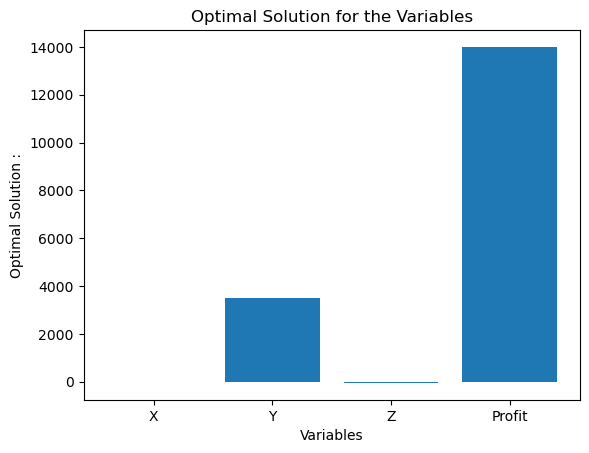

In [3]:
import matplotlib.pyplot as plt

labels = ['X', 'Y', 'Z', 'Profit']
values = [opt_X, opt_Y, opt_Z, opt_profit]

plt.bar(labels, values)                          # Plot the bar chart for the optimal solution
plt.ylabel('Optimal Solution :')
plt.xlabel('Variables')
plt.title('Optimal Solution for the Variables')
plt.show()

From the results we can interpret the following 

X (Bond) - The optimal solution suggest that we should not purchase bonds, means allocating investment to bond doesnot contribute for maximizing the profit.

Y (Stock XYZ) - The solution suggest that , we should purchase 3500 stocks of XYZ, which will help in maximizing the profit.

Z (Call option) - From the optimal solution, we can interpret that we should sold 50 call option as value is -50, which will help to maximizing the profit.

### PART B - 1 - (ii)

Objective function: **(1/3)(P1 + P2 + P3)**

The investor's goal is to maximise their predicted profit, which is determined by averaging the gains from three possible scenarios. The variables P1, P2, and P3 indicate the anticipated profit in each scenario, and the objective function determines the average of these three profits using the formula (1/3)(P1 + P2 + P3). 

1/3 is used as we have 3 scenerios and are equally likely

Budget constraint: **90X + 20Y + 1000Z ≤ 20000**



i) Profit in scenario 1: Stock XYZ - £40

The left-hand side of the equation 10X + 20Y + 1500Z represents the total revenue from selling bonds, shares of company XYZ, and call options, and this revenue is used to calculate the profit in scenario 1. This profit is equal to the variable P1.

(100X-90X) + (40Y-20Y) + ((4000-1500)-1000)Z = P1

**10X + 20Y + 1500Z = P1**



ii) Profit in scenario 2: Stock XYZ - £20

The left-hand side of the equation 10X - 500Z represents the total revenue from selling bonds, shares of company XYZ, and call options, and this revenue is used to calculate the profit in scenario 2. This profit is equal to the variable P2.

(100X-90X) + (20Y-20Y) + ((2000-1500)-1000)Z = P1

**10X - 500Z = P2**



ii) Profit in scenario 3: Stock XYZ - £12

The left-hand side of the equation 10X - 8Y - 1000C represents the total revenue from selling bonds, shares of company XYZ, and call options, and this revenue is used to calculate the profit in scenario 3. This profit is equal to the variable P3.

(100X-90X) + (12Y-20Y) + (0-1000)Z = P1

**10X - 8Y - 1000Z = P3**

Expected profit constraints: **P1 ≥ 2000, P2 ≥ 2000, P3 ≥ 2000**

The investor wants to make sure that each scenario's expected profit is at least $2000. So, P1 ≥ 2000, P2 ≥ 2000, and P3 ≥ 2000 

Limit on number of call options purchased or sold: **Z ≤ 50 and Z ≥ -50**

The investor has a limit on the number of call options that can be purchased or sold, which is at most 50. These constraints are represented by the formulas C ≤ 50 and C ≥ -50, which ensure that the number of call options is within the specified limit.

Non-negativity constraint: X ≥ 0, Y ≥ 0, Z ≥ 0

The decision variables X, Y, and Z, which represent the number of bonds, shares of stock XYZ, and call options, respectively, should be non-negative, as it is not possible to have a negative number of investments. These constraints are represented by the formulas X ≥ 0, Y ≥ 0, and Z ≥ 0


Objective function: (1/3)(P1 + P2 + P3)

       90X + 20Y + 1000Z ≤ 20000 (Budget Constraint)

       10X + 20Y + 1500Z = P1    (when stock price is £40)

       10X - 500Z = P2           (when stock price is £20)

       10X - 8Y - 1000Z = P3     (when stock price is £100)

       P1 ≥ 2000              (as profit should be greater than or equal 2000)

       P2 ≥ 2000

       P3 ≥ 2000

       Z ≤ 50 (no: of call options, purchased or sold, which is at most 50)

       Z ≥ -50

       X ≥ 0, Y ≥ 0, Z ≥ 0      (Non-negativity constraint)

In [4]:
import gurobipy as gp

# model creation
model_profit = gp.Model("Maximize_Profit")

# Define decision variables
X = model_profit.addVar(lb=0, vtype=gp.GRB.CONTINUOUS, name="X") 
Y = model_profit.addVar(lb=0, vtype=gp.GRB.CONTINUOUS, name="Y")  
Z = model_profit.addVar(lb=-50, ub=50, vtype=gp.GRB.CONTINUOUS, name="Z")  
P1 = model_profit.addVar(lb=2000, vtype=gp.GRB.CONTINUOUS, name="P1") 
P2 = model_profit.addVar(lb=2000, vtype=gp.GRB.CONTINUOUS, name="P2")
P3 = model_profit.addVar(lb=2000, vtype=gp.GRB.CONTINUOUS, name="P3") 

# Update the model to integrate new variables
model_profit.update()

# Set the objective function
model_profit.setObjective(1/3 * P1 + 1/3 * P2 + 1/3 * P3, gp.GRB.MAXIMIZE)  # Maximize: 1/3 P1 + 1/3 P2 + 1/3 P3

# Add constraints
model_profit.addConstr(90 * X + 20 * Y + 1000 * Z <= 20000, "cons1")   # 90X + 20Y + 1000Z <= 20000
model_profit.addConstr(10 * X + 20 * Y + 1500 * Z == P1, "cons2")      # 10X + 20Y + 1500Z = P1
model_profit.addConstr(10 * X - 500 * Z == P2, "cons3")                # 10X - 500Z  = P2
model_profit.addConstr(10 * X - 8*Y - 1000 * Z == P3, "cons4")         # 10X -8y - 1000Z = P3
model_profit.addConstr(Z <= 50, "cons5")                               # Z <= 50
model_profit.addConstr(Z >= -50, "cons6")                              # Z >= -50
model_profit.addConstr(P1 >= 2000, "cons7")                            # P1 >= 2000
model_profit.addConstr(P2 >= 2000, "cons8")                            # P2 >= 2000
model_profit.addConstr(P3 >= 2000, "cons9")                            # P3 >= 2000


model_profit.optimize()                                                # Model optimization


if model_profit.status == gp.GRB.OPTIMAL:                              # Optimization result
    print("Optimal Solution:")
    print("X =", X.x)
    print("Y =", Y.x)
    print("Z =", Z.x)
    print("P1 =", P1.x)
    print("P2 =", P2.x)
    print("P3 =", P3.x)
    print("Maximum Value of Objective =", model_profit.objVal)
else:
    print("Optimization failed :", model_profit.status)


Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) i5-5350U CPU @ 1.80GHz
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 9 rows, 6 columns and 19 nonzeros
Model fingerprint: 0xed64f8ce
Coefficient statistics:
  Matrix range     [1e+00, 2e+03]
  Objective range  [3e-01, 3e-01]
  Bounds range     [5e+01, 2e+03]
  RHS range        [5e+01, 2e+04]
Presolve removed 5 rows and 0 columns
Presolve time: 0.12s
Presolved: 4 rows, 6 columns, 14 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.6177223e+04   3.601495e+03   0.000000e+00      0s
       4    1.1200000e+04   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.17 seconds (0.00 work units)
Optimal objective  1.120000000e+04
Optimal Solution:
X = 0.0
Y = 2800.0
Z = -36.0
P1 = 2000.0
P2 = 18000.0
P3 = 13600.0
Maximum Value of Objective = 11200.0


<bound method _make_class_factory.<locals>.class_factory.<locals>.subcls.set of <AxesSubplot:ylabel='Value'>>

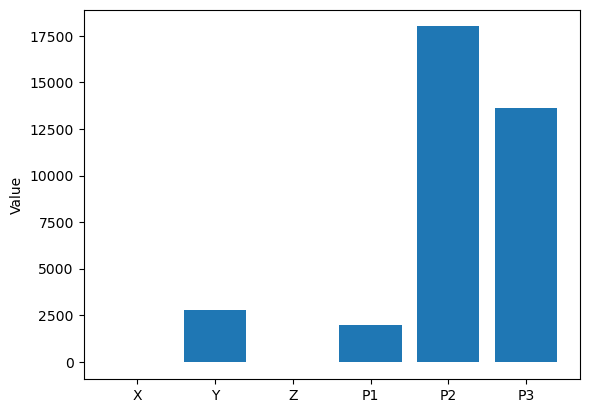

In [5]:
labels = ['X', 'Y', 'Z', 'P1', 'P2', 'P3']
values = [X.x, Y.x, Z.x, P1.x, P2.x, P3.x]
fig, ax = plt.subplots()
ax.bar(labels, values)
ax.set_ylabel('Value')
ax.set

Based on the optimal solution obtained from the linear program, the following can be interpreted:

**Optimal Portfolio**: The optimal solution suggests that the investor should buy 2,800 shares of stock XYZ and sell 36 call options. This portfolio maximizes the expected profit.

**Expected Profit**: The expected profit from this portfolio is 11200 which is calculated as the expected worth in six months (£31,200) minus the initial investment (£20,000).

**Risk Management**: By considering three different scenarios for the price of stock XYZ in six months and limiting the number of call options bought or sold to at most 50, the investor is able to manage risk and ensure a minimum profit of £2,000 in each scenario.

**Diversification**: The optimal portfolio includes both stocks and options, providing diversification in the investment strategy. The investor can potentially benefit from both the stock's price appreciation and the premiums received from selling call options.

**Budget Constraint**: The budget constraint is satisfied, as the total cost of buying stocks and bonds, and selling call options does not exceed the initial investment of £20,000.

Overall, the linear programming approach allows the investor to optimize their investment strategy while considering different scenarios, risk management, and budget constraints, resulting in a portfolio that maximizes expected profit.




